In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from TO_sim.analytical.order_parameter import Make_empirical_KR_0 as KR0, dK_graph, Make_empirical_KR as KR, split_uo
from TO_sim.gen_Distribution import Normal, Quantile_Normal as Q_Normal, Lorentzian
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2_sets as mf2_sets
from TO_sim.Kuramoto_model import Kuramoto_2nd_mf_sets_r,Kuramoto_2nd_mf,Kuramoto_1st_mf_sets_r,Kuramoto_1st_mf
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2_sets_not0 as mf2_sets_TLO
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2_sets_0 as mf2_sets_0
import numpy as np
import pandas as pd
from TO_sim.get_cluster import cluster_os_new2
from TO_sim.Integrator import RK4

from TO_sim.get_cluster import C_rsmso, cluster_os, C_rsmso_set_new
from TO_sim.To_Draw import Draw_avg_vel_r
from scipy.integrate import solve_ivp,odeint
import seaborn as sns
max_c = 3e-4

In [2]:
m = 6
# m_set = np.arange(0.1,10+0.1/2,0.2).reshape(-1,1)
K = 4
seed = 100
N = 500
theta_init, omega, Kc = Normal(N, 0, 1, seed=seed)
N_set = 50
omega = np.sort(omega) - np.mean(omega)
theta_sets = (np.ones((N_set, 1))*theta_init)
# theta_sets = (np.ones((N_set,1))*np.ones_like(theta_init))
omega_sets_temp = (np.ones((N_set, 1))*np.zeros_like(omega))
theta_init, omega_, Kc = Normal(N, 0, 1, seed=10)

for i in range(N_set):
    theta_init, omega, Kc = Normal(N, 0, 1, seed=i)
    omega = np.sort(omega) - np.mean(omega)
    omega_sets_temp[i] = omega_
    theta_sets[i] = theta_init
omega_sets = omega_sets_temp

# m = 10
t_end = 2000
dt = 0.01
t = np.arange(0, t_end, dt)
theta_set, dtheta_set, rs = mf2_sets_TLO(m_set=m, N=N, K=K, t_array=t, p_theta=theta_sets,
                                         p_dtheta=0*omega_sets, p_omega=omega_sets, result_time=int((t_end-350)*(1/dt)))

c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\Kuramoto_model.py:103: ComplexWarning: Casting complex values to real discards the imaginary part
  theta_sets[:,N:2*N] = ddtheta


In [60]:
dtheta_set.shape

(3501, 50, 500)

In [71]:
rs = rs[::10]

In [82]:
rs.shape

(20000, 50, 1)

In [83]:
rs_ = rs.T[0].T
sum_time = 2000
r_mean = np.array([np.mean(rs_[i:i+sum_time], axis=0)
                  for i in range(len(t)-sum_time)])
r_std = np.array([np.std(rs_[i:i+sum_time], axis=0)
                 for i in range(len(t)-sum_time)])
dtheta_c = np.cumsum(dtheta_set, axis=0)
avg_dtheta_set = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

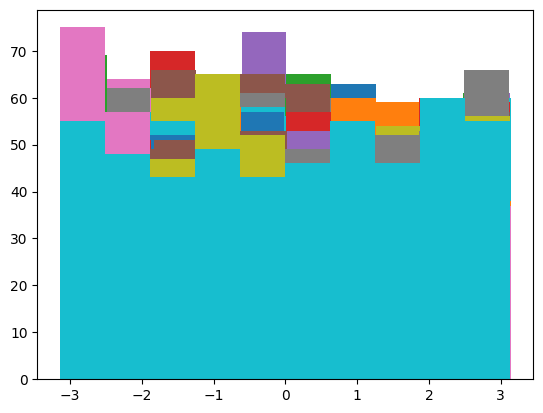

In [73]:
for theta in theta_sets:
    plt.hist(theta)

In [74]:
rs.shape

(20000, 50, 1)

(0.0, 500.0)

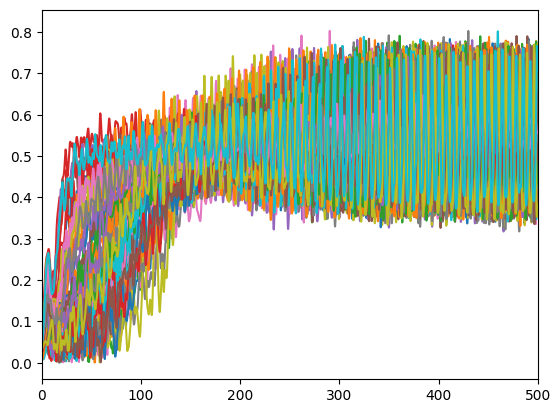

In [76]:
# plt.plot(t[sum_time:], r_mean)
for i in range(N_set):
    plt.plot(t[::10],rs.T[0].T[:,i])
plt.xlim(0,500)

In [77]:
t = t[::10]

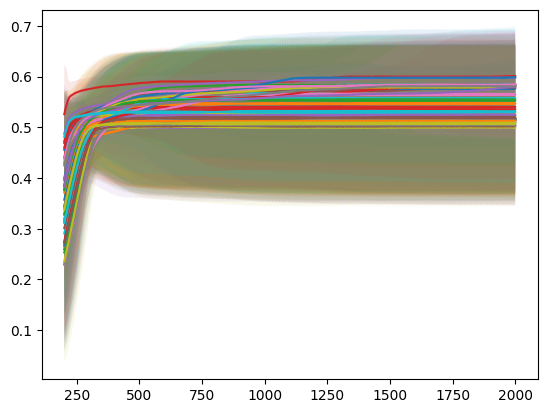

In [84]:
plt.plot(t[sum_time:], r_mean)
for i in range(N_set):
    plt.fill_between(t[sum_time:], (r_mean-r_std)[:, i],
                     (r_mean+r_std)[:, i], alpha=0.1)
# plt.xlim(0,500)

In [85]:
dtype = [('cluster size', int), ('cluster mean phase velocity', float)]
CSO_set = []
check_set = []
cluster_set = []
Is_group_set = []
c_threshold = np.where(r_mean < 0.1, 1e-4, 3e-4)
error_set = []
# Ks =K_set.reshape(-1)
for i in range(N_set):
    AVG = avg_dtheta_set[-1500:, i]
    c_check = c_threshold[i]
    CS, CMP, cluster, omega_s, omega_e, CMO, Is_group, C_s, C_e = cluster_os_new2(
        AVG, height=1e-2, c_std=3, check=3e-4, c_size=5, N=500, omega=omega_sets[i])

    CSO = np.array([(S, O) for S, O in zip(CS, CMP)], dtype=dtype)
    CSO_set.append(CSO)

print(error_set)

[]


In [86]:
C_0 = []
C_1 = []
C_2 = []

for i in range(N_set):
    A = CSO_set[i]['cluster size']
    if len(A) >= 3:
        C_0.append(A[0])
        C_1.append(A[1])
        C_2.append(A[2])

    if len(A) == 2:
        C_0.append(A[0])
        C_1.append(A[1])
        C_2.append(0)
    elif len(A) == 1:
        C_0.append(A[0])
        C_1.append(0)
        C_2.append(0)
    elif len(A) == 0:
        C_0.append(0)
        C_1.append(0)
        C_2.append(0)

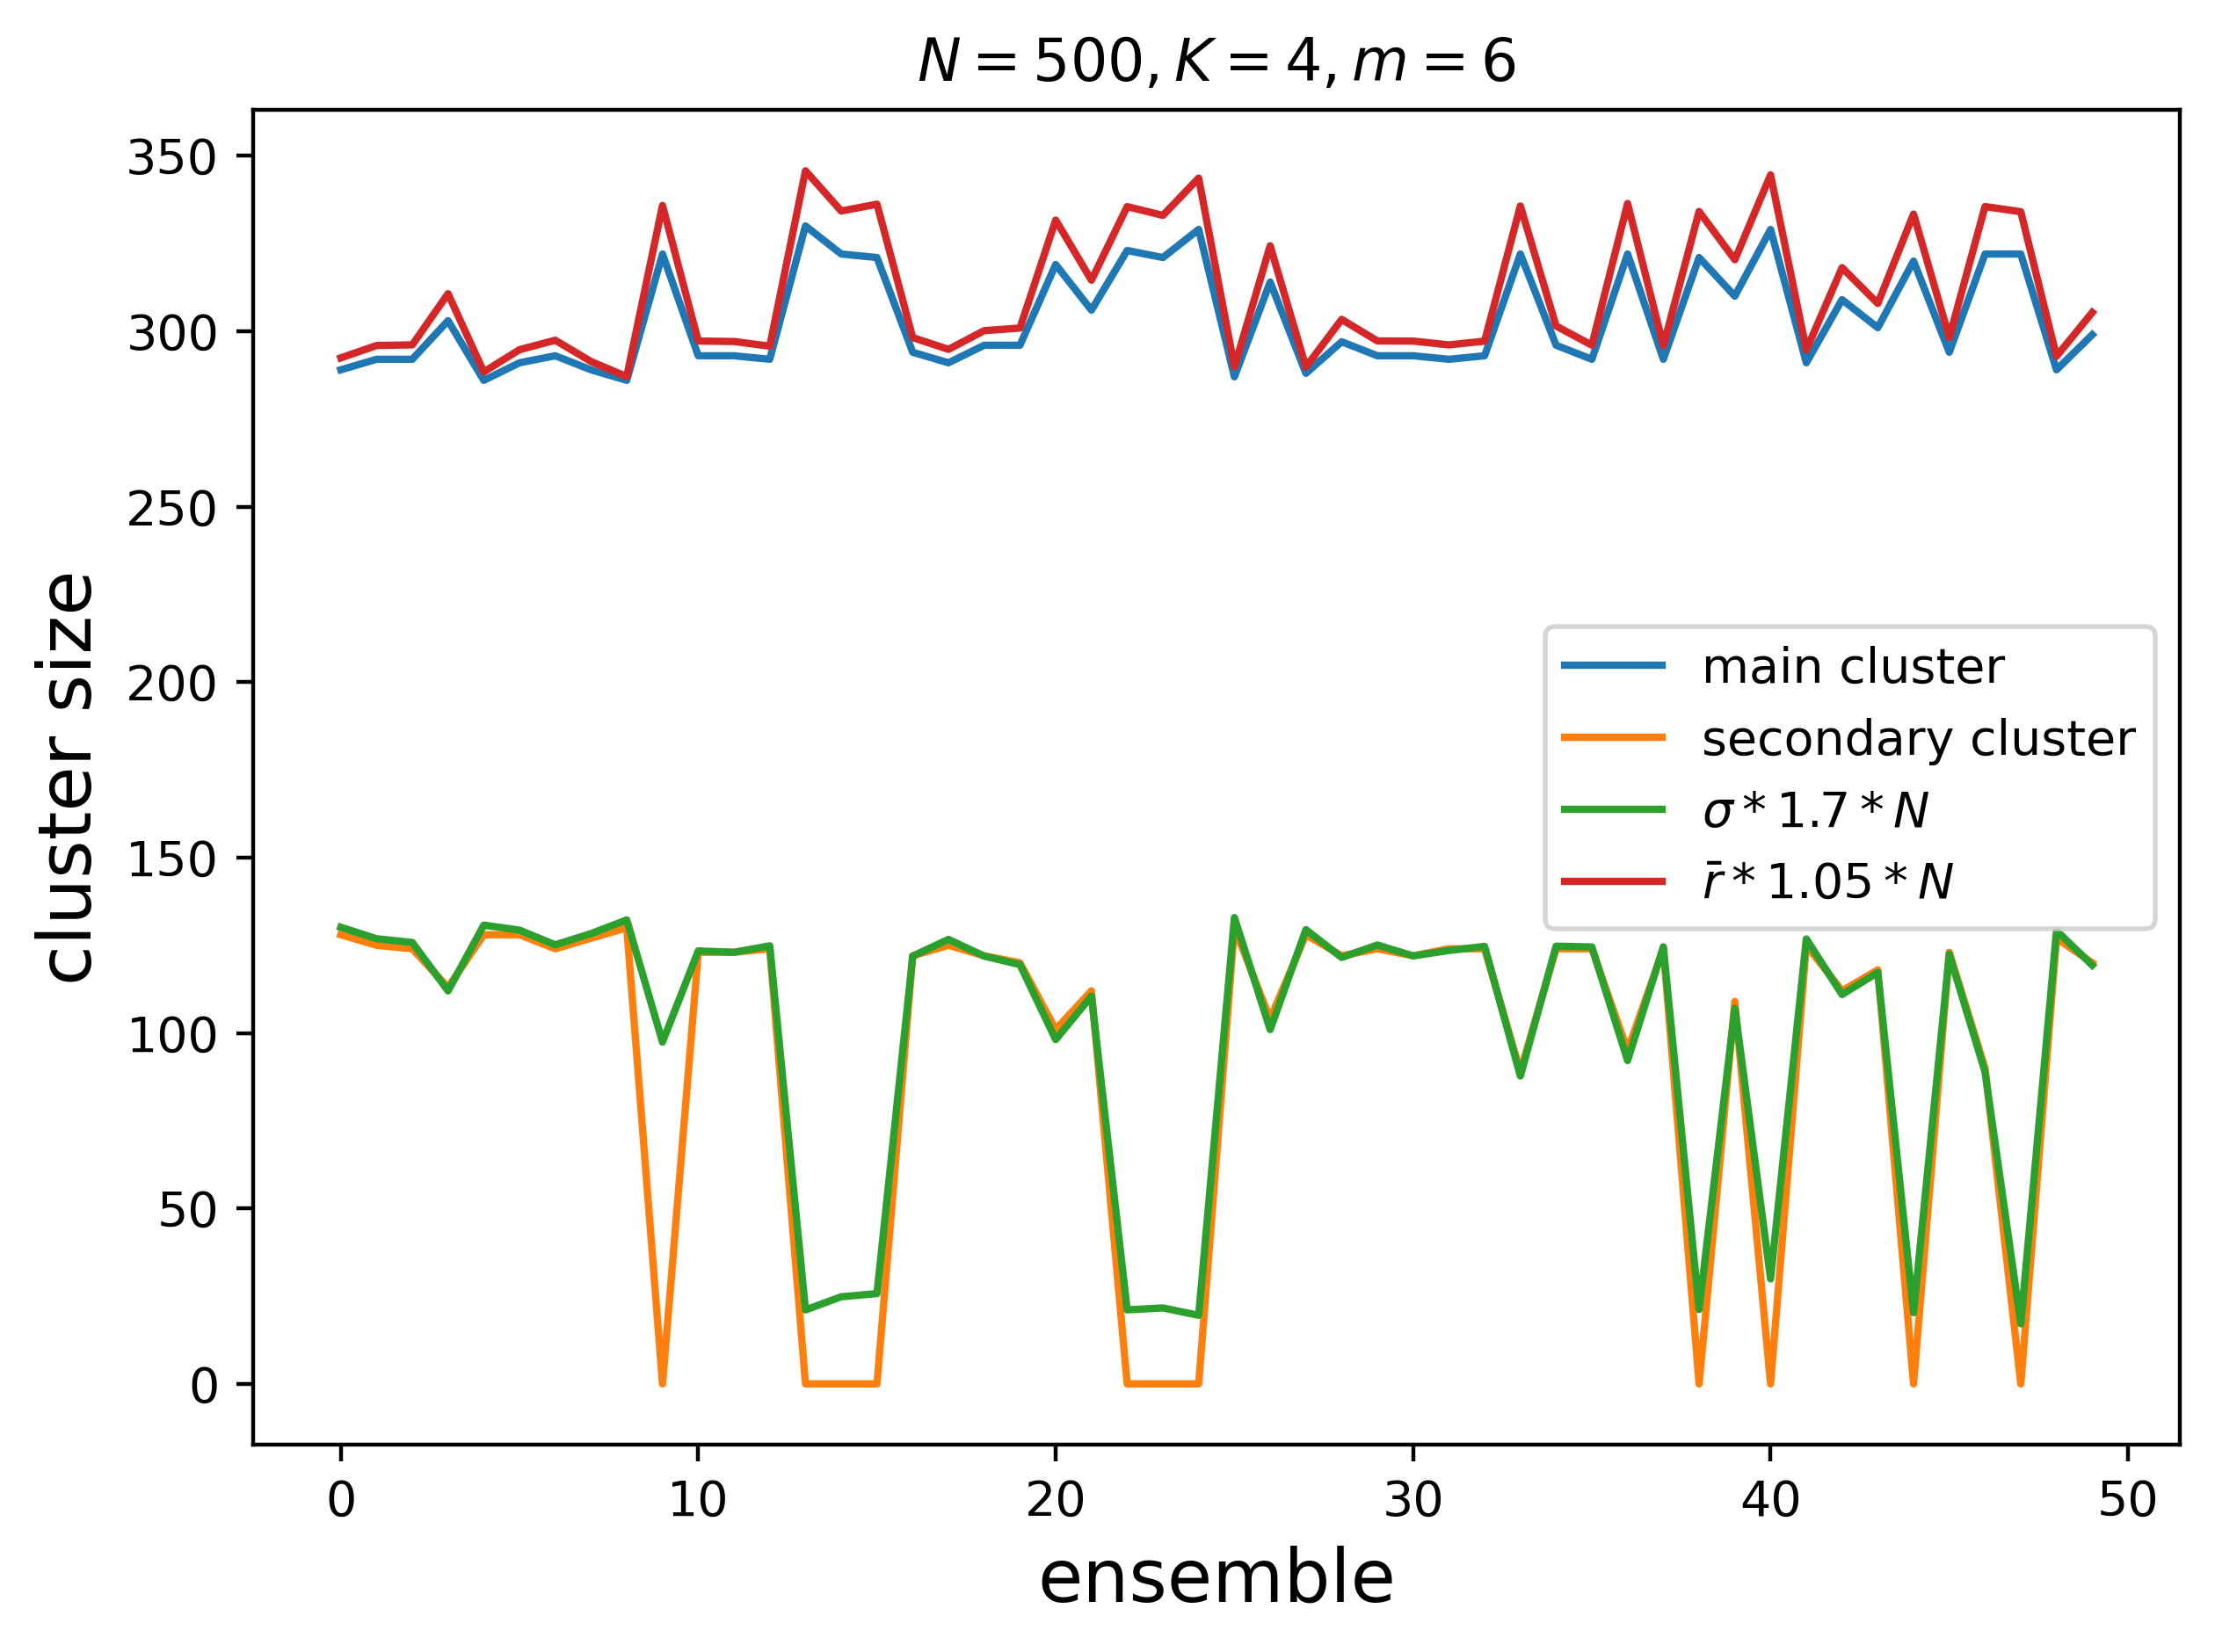

In [87]:
plt.figure(dpi=400)
plt.plot(np.array(C_0), label='main cluster')
plt.plot(np.array(C_1) + np.array(C_2), label='secondary cluster')
# plt.plot(np.array(C_2))
plt.plot(r_std[-1]*1.7*N, label=r'$\sigma*1.7*N$')
plt.plot(r_mean[-1]*1.15*N, label=r'$\bar{r}*1.05*N$')
plt.legend()
plt.ylabel('cluster size', fontsize=15)
plt.xlabel('ensemble', fontsize=15)
plt.title(rf'$N = {N}, K = {K}, m = {m}$')
plt.tight_layout()
plt.show()

In [2]:
m = 0
# m_set = np.arange(0.1,10+0.1/2,0.2).reshape(-1,1)
K = 1.60
seed = 100
N = 500
theta_init, omega, Kc = Normal(N, 0, 1, seed=seed)
N_set = 50
omega = np.sort(omega) - np.mean(omega)
theta_sets = (np.ones((N_set, 1))*theta_init)
# theta_sets = (np.ones((N_set,1))*np.ones_like(theta_init))
omega_sets_temp = (np.ones((N_set, 1))*np.zeros_like(omega))

for i in range(N_set):
    theta_init, omega, Kc = Normal(N, 0, 1, seed=i)
    omega = np.sort(omega) - np.mean(omega)
    omega_sets_temp[i] = omega
omega_sets = omega_sets_temp

# m = 10
t_end = 2000
dt = 0.1
t = np.arange(0, t_end, dt)
theta_set, dtheta_set, rs = mf2_sets_0(m=m, N=N, K_set=K, t_array=t, p_theta=theta_sets,
                                         p_dtheta=0*omega_sets, p_omega=omega_sets, result_time=int((t_end-350)*(1/dt)))

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1m[1m[1m[1mFailed in nopython mode pipeline (step: nopython frontend)
[1m[1mNo implementation of function Function(<built-in function setitem>) found for signature:
 
 >>> setitem(array(float64, 2d, C), UniTuple(slice<a:b> x 2), array(complex128, 2d, C))
 
There are 16 candidate implementations:
[1m   - Of which 16 did not match due to:
   Overload of function 'setitem': File: <numerous>: Line N/A.
     With argument(s): '(array(float64, 2d, C), UniTuple(slice<a:b> x 2), array(complex128, 2d, C))':[0m
[1m    No match.[0m
[0m
[0m[1mDuring: typing of setitem at c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\Kuramoto_model.py (122)[0m
[1m
File "TO_sim\Kuramoto_model.py", line 122:[0m
[1mdef Kuramoto_1st_mf_sets_r(theta_sets,t,omega,N,m,K_set):
    <source elided>
    dtheta = omega + K_set*r*np.sin(psi - theta)
[1m    theta_sets[:,:N] = dtheta
[0m    [1m^[0m[0m

[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function Kuramoto_1st_mf_sets_r at 0x00000134453CD8A0>))[0m
[0m[1mDuring: typing of call at c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\Integrator.py (144)
[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function Kuramoto_1st_mf_sets_r at 0x00000134453CD8A0>))[0m
[0m[1mDuring: typing of call at c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\Integrator.py (144)
[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function Kuramoto_1st_mf_sets_r at 0x00000134453CD8A0>))[0m
[0m[1mDuring: typing of call at c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\Integrator.py (144)
[0m
[1m
File "TO_sim\Integrator.py", line 144:[0m
[1mdef RK4_r_sets(f, y0, t, args=(),result_time = 0):
    <source elided>
    for i in range(result_time):
[1m        k1,r = f(y_, t, *args)
[0m        [1m^[0m[0m


In [3]:
np.c_[theta_sets,theta_sets].shape

(50, 1000)

In [ ]:
solve_ivp

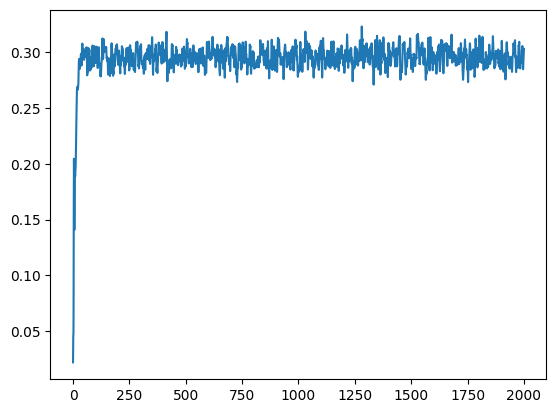

In [3]:
plt.plot(t,np.mean(rs.T[0].T,axis=1))

In [4]:

f = lambda t,theta_sets,omega,N,m,K_set: Kuramoto_1st_mf_sets_r(theta_sets, t, omega, N, m, K_set)
f = lambda theta_sets,t,omega,N,m,K_set: Kuramoto_1st_mf(theta_sets, t, omega, N, m, K_set)
f = lambda t,theta_sets,omega,N,m,K_set: Kuramoto_1st_mf(theta_sets, t, omega, N, m, K_set)

In [4]:
solve_ivp

<function scipy.integrate._ivp.ivp.solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)>

array([0.0000e+00, 1.0000e-01, 2.0000e-01, ..., 1.9997e+03, 1.9998e+03,
       1.9999e+03])

In [44]:
t = np.arange(0,t_end+0.1/2,0.1)

In [52]:
np.c_[theta_sets,0*omega_sets].shap

(50, 1000)

In [54]:
s.shape

(1000,)

In [6]:
sets = np.c_[theta_sets,0*omega_sets] 
rs2 = []
for s,omega in zip(sets,omega_sets):
    sol = solve_ivp(f,t_span=[0,t_end],t_eval=t,y0=s,args=(omega,N,m,K),max_step=0.1)
    # sol = odeint(f,y0=s,t=t,args=(omega,N,m,K))
    r = np.abs(np.mean(np.exp(sol[:N]*1j),axis=0))

    rs2.append(r)
    # break
# solve_ivp(f,t_span=[0,t_end],t_eval=t,y0=sets,args=(omega_sets,N,m,K))

TypeError: unhashable type: 'slice'

In [61]:
sol1 = solve_ivp(f,t_span=[0,t_end],t_eval=t,y0=s,args=(omega,N,m,K),dense_output=True)
r1 = np.abs(np.mean(np.exp(sol1.y[:N]*1j),axis=0))
sol2 = solve_ivp(f,t_span=[0,t_end],t_eval=t,y0=s,args=(omega,N,m,K),rtol=1e-6)
r2 = np.abs(np.mean(np.exp(sol.y[:N]*1j),axis=0))
sol3 = solve_ivp(f,t_span=[0,t_end],t_eval=t,y0=s,args=(omega,N,m,K),dense_output=True)
r3 = np.abs(np.mean(np.exp(sol.sol(t)*1j),axis=0))


In [21]:
sol2 = solve_ivp(f,t_span=[0,t_end],t_eval=t,y0=s,args=(omega,N,m,K),rtol=1e-6)
r2 = np.abs(np.mean(np.exp(sol2.y[:N]*1j),axis=0))

In [26]:
sol = odeint(f,y0=s,t=t,args=(omega,N,m,K))
r3 = np.abs(np.mean(np.exp(sol.T[:N]*1j),axis=0))


TypeError: 'float' object is not subscriptable

In [25]:
sol2.y.shape

(1000, 20000)

In [23]:
sol.shape

(20000, 1000)

In [7]:
import imp

import TO_sim.Integrator_jit as IJ
import TO_sim.Kuramoto_model as KU
imp.reload(IJ)
imp.reload(KU)
RK4_jit = IJ.RK4


C:\Users\kim9y\AppData\Local\Temp\ipykernel_43328\1994971782.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


In [8]:
sol_RK4_jit = RK4_jit(IJ.Kuramoto_1st_mf,s, t, args=(omega, N, m, K))
# sol_RK4_jit = RK4_jit(IJ.Kuramoto_1st_mf,s, t, args=(omega, N, m, K))

 ...]

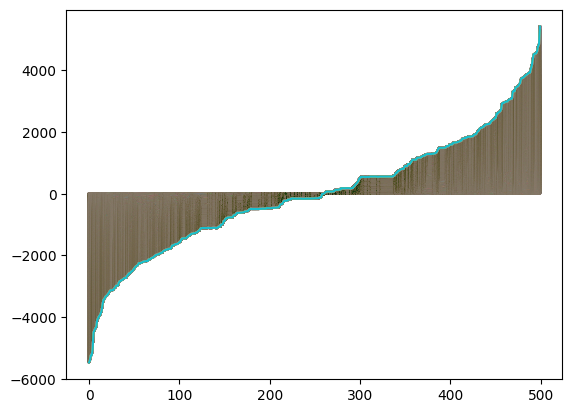

In [9]:
plt.plot(sol_RK4_jit[:,:N].T)

In [10]:
sol_RK4 = RK4(IJ.Kuramoto_1st_mf,s, t, args=(omega, N, m, K))

In [11]:
%timeit  RK4_jit(IJ.Kuramoto_1st_mf,s, t, args=(omega, N, m, K))

1.05 s ± 9.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%timeit  RK4(IJ.Kuramoto_1st_mf,s, t, args=(omega, N, m, K))

1.72 s ± 34.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
%timeit  RK4(Kuramoto_1st_mf,s, t, args=(omega, N, m, K))

1.79 s ± 13.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [57]:
np.concatenate([np.zeros(N),np.zeros(N)]).shape

(1000,)

In [66]:
r3 = np.abs(np.mean(np.exp(sol.sol(t[::10])*1j),axis=0))

In [27]:
r3 = np.abs(np.mean(np.exp(sol.T[:N]*1j),axis=0))


In [108]:

r_RK4_jit = np.abs(np.mean(np.exp(sol_RK4_jit.T[:N]*1j),axis=0))

In [99]:
# sol_RK4 = RK4(Kuramoto_1st_mf,s, t, args=(omega, N, m, K))
sol_RK4 = RK4(IJ.Kuramoto_1st_mf,s, t, args=(omega, N, m, K))
r_RK4 = np.abs(np.mean(np.exp(sol_RK4.T[:N]*1j),axis=0))


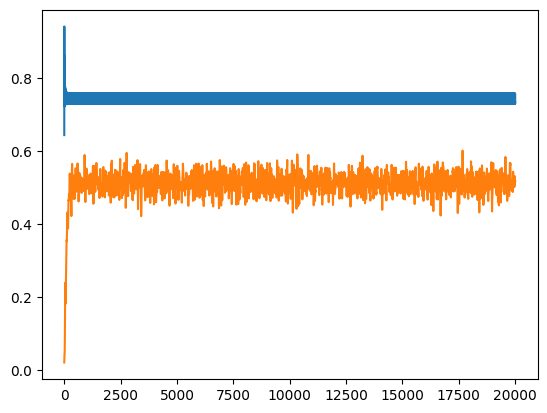

In [109]:
plt.plot(r_RK4)
plt.plot(r_RK4_jit)

In [88]:
sol_RK4.shape

(20000, 1000)

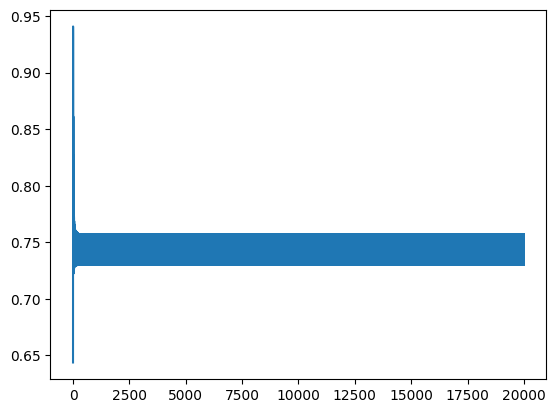

In [89]:
# r3 = np.abs(np.mean(np.exp(sol[:N]*1j),axis=0))

# plt.plot(r3)
plt.plot(r_RK4)
# plt.plot(r2)

In [65]:
sol.sol(t)

array([[ 2.72721293e-01, -2.70122182e-02, -3.27834470e-01, ...,
        -5.57417026e+03, -5.57443925e+03, -5.57473121e+03],
       [-1.39254622e+00, -1.68280246e+00, -1.97264743e+00, ...,
        -5.40443162e+03, -5.40467604e+03, -5.40495198e+03],
       [-4.74269965e-01, -7.12118938e-01, -9.50575863e-01, ...,
        -4.38846952e+03, -4.38877573e+03, -4.38903019e+03],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

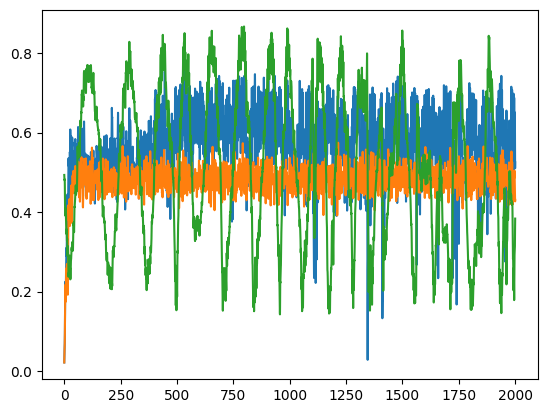

In [62]:
plt.plot(t,r1)
plt.plot(t,r2)
plt.plot(t,r3)

In [57]:
r = np.abs(np.mean(np.exp(sol.y[:N]*1j),axis=0))


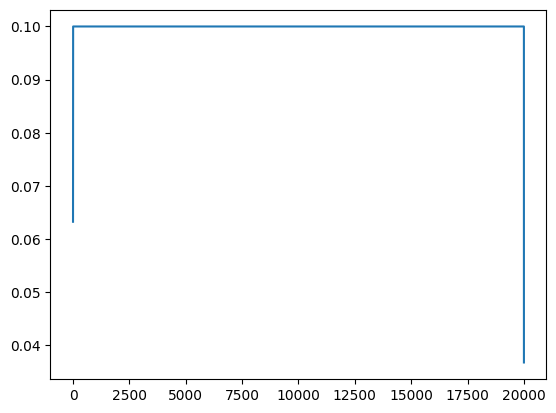

In [53]:
# plt.plot(sol.t)
plt.plot(np.diff(sol.t))
# dt = 0.1, 0.01

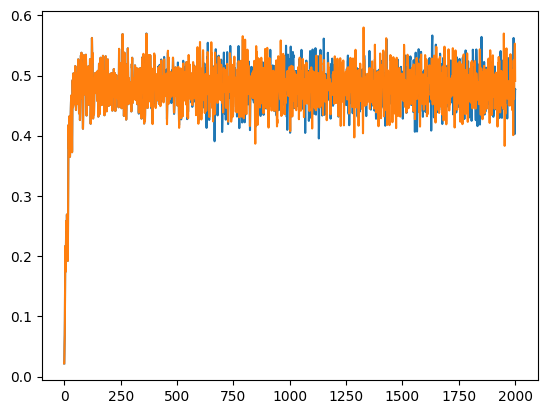

In [42]:
plt.plot(t,r)
plt.plot(t,rs.T[0][-1])

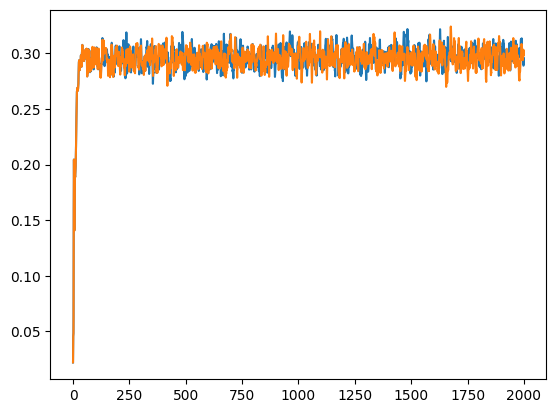

In [39]:
# plt.plot(t,np.array(rs2).T); 
plt.plot(t,np.mean(np.array(rs2).T,axis=1));
plt.plot(t,np.mean(rs.T[0].T,axis=1));

In [20]:
r.shape

(20000,)

In [10]:
eval=t,y0=s,args=(omega,N,m,K))
    break

# solve_ivp(f,t_span=[0,t_end],t_eval=t,y0=sets,args=(omega_sets,N,m,K))

SyntaxError: unmatched ')' (1347783123.py, line 1)

In [ ]:
sol = solve_ivp(f,t_span=[0,t_end],t_eval=t,y0=s,args=(omega,N,m,K))
